In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sys

#N Queens algorithm

The n-queens problem is a problem based on xadrez that the player needs to place the queens in such a way that no queens are being attacked by other ones. Therefore, all queen's rows, columns, and diagonals should not have any queen left.

In [80]:

class n_queens:

  def __init__(self,n,random_condition=True):

    self.board  = [random.randint(0,n-1) for nothing in range(n)] if random_condition else [np.NaN for nothing in range(n)]
    self.n = n
  
  def detect_collison(self):

    for i in range(self.n-1):

      for j in range(i+1,self.n):

        if (i - self.board[i] == j - self.board[j]) or (i + self.board[i] == j + self.board[j]) or self.board[i] == self.board[j]:
          return True
    return False

  def account_collison(self,board=None):

    count = 0

    if board is None:
      board = self.board

    for i in range(self.n-1):
      for j in range(i+1,self.n):
        if (board[j] == board[i]):
          count += 1

    for i in range(self.n-1):
      for j in range(i+1,self.n):
        if  (i - board[i] == j - board[j]):
          count+=1      
  
    for i in range(self.n-1):
      for j in range(i+1,self.n):
        if (i + board[i] == j + board[j]):
          count +=1
    
    return count
  
  def random_permutation(self,tries_number,print_dash=False):

    self.board = np.random.permutation(self.n)
    new_board = self.board.copy()
    best_attacks = self.account_collison()

    all_attack_numbers = []
    all_attack_numbers.append(best_attacks)
    
    iteration = 0

    for simulation in range(tries_number):

      new_board = np.random.permutation(self.board)
      current_attacks = self.account_collison(new_board)

      if current_attacks < best_attacks:

        best_attacks = current_attacks
        self.board = new_board
        all_attack_numbers.append(best_attacks)
      
      if best_attacks == 0:
        break
      iteration+=1

    return [best_attacks,iteration,all_attack_numbers]

  def swap_2(self,tries_number,print_dash=False):

    self.board = [index for index in range(self.n)]
    best_attacks = self.account_collison()
    iteration = 0
    all_attack_numbers = []
    all_attack_numbers.append(best_attacks)

    for simulation in range(tries_number):
      
      new_board = self.board.copy()
      
      if print_dash:
        self.print_board()

      a = random.randint(0,self.n-1)
      b = random.randint(0,self.n-1)
      
      aux = new_board[a]
      new_board[a] = new_board[b]
      new_board[b] = aux
      current_attacks = self.account_collison(new_board)

      if current_attacks < best_attacks:

        best_attacks = current_attacks
        self.board = new_board
        all_attack_numbers.append(best_attacks)
      
      if best_attacks == 0:
        break
      
      iteration+=1

    return [best_attacks,iteration,all_attack_numbers]


  def brute_force(self,pivot=0):    

    if math.isnan(self.board[pivot]):
      self.board[pivot] = -1
    
    if self.board[pivot] is self.n-1:
      self.board[pivot] = np.NaN
      pivot-=1
      pivot = self.brute_force(pivot)

    if pivot >= self.n:
     return pivot

    if self.board[pivot]  < self.n-1:
      self.board[pivot] += 1

    if self.detect_collison():

      if self.board[pivot] is self.n-1:
        self.board[pivot] = np.NaN
        pivot-=1
        pivot = self.brute_force(pivot)
      else:  
        pivot = self.brute_force(pivot)
    else:
      pivot+=1
      if pivot >= self.n:
        return pivot
      pivot = self.brute_force(pivot)

    return pivot

  def set_board(self,board):

    self.board = board
    self.n = len(board)
  
  def print_board(self):
  
    board_and_queens = np.zeros((self.n,self.n))
    
    for i in range(self.n):
      try:
        if self.board[i] is not np.NaN:
          board_and_queens[self.board[i]][i] = 1
      except IndexError as error:
        print(f'Posição escolhida para dama {i} fora dos limites do tabuleiro')
        print(error)
    
    print(board_and_queens)



#Permutation

Permute the entire array to attempt to generate a better solution in terms of attack numbers. 

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
0


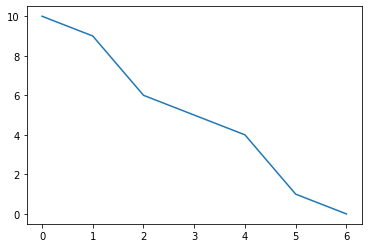

In [82]:
dash_n_queens = n_queens(10,random_condition=False)
[the_best,iterations,improved_results] = dash_n_queens.random_permutation(40000,False)
dash_n_queens.print_board()
print(the_best)
plt.plot(improved_results)
plt.show()

#Two Swap 

Swap 2 elements of the solution array based on 2 generated random numbers ranging from 0 to array length-1 that represent the positions in the array to be swapped.

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1


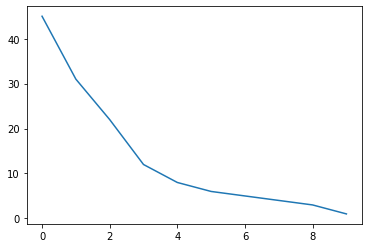

In [83]:
dash_n_queens = n_queens(10,random_condition=False)
[the_best,iterations,improved_results] = dash_n_queens.swap_2(4000,False)
dash_n_queens.print_board()
print(the_best)
plt.plot(improved_results)
plt.show()

#Brute Force

In [ ]:
dash_n_queens = n_queens(4,random_condition=False)
dash_n_queens.brute_force()
dash_n_queens.print_board()

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


#Metaheuristics Algorithms


In [69]:
class Metaheuristics:

  def __init__(self,simulation_number,method,max_iteration,board_queens,print_board=False):

    self.simulation_number = simulation_number
    self.method = method
    self.solutions = []
    self.best_result = float('inf')
    self.max_iteration = max_iteration
    self.print_board = print_board
    self.board_queens = board_queens
  
  def RMS(self):

    [old_result,count,all_simulation_results] = [0,0,[]]
    
    print('Inicializando simulação!!!!!\n')
    
    for simulation_index in range(self.simulation_number):

      old_result = self.method(self.max_iteration,self.print_board)[0] 
      
      #print(f"\nSimulação {simulation_index+1}: {old_result}\n")
      all_simulation_results.append(old_result)

      if old_result < self.best_result:
        self.best_result = old_result
        if self.best_result == 0:
          break
      count+=1

    return [self.best_result,count,self.board_queens.board,all_simulation_results]

board_size = 6
simulation_number = 5
max_iteration = 20

board_n_queens = n_queens(board_size,random_condition=False)
RMS_results = Metaheuristics(simulation_number,board_n_queens.random_permutation,max_iteration,board_n_queens,True).RMS()
display(RMS_results)
board_n_queens.print_board()

Inicializando simulação!!!!!



[0, 3, array([4, 2, 0, 5, 3, 1]), [1, 1, 1, 0]]

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


##Permutation

In [72]:
board_size = 6
simulation_number = 5
max_iteration = 20

board_n_queens = n_queens(board_size,random_condition=False)
RMS_results = Metaheuristics(simulation_number,board_n_queens.random_permutation,max_iteration,board_n_queens,True).RMS()
display(RMS_results)
board_n_queens.print_board()

Inicializando simulação!!!!!



[0, 1, array([4, 2, 0, 5, 3, 1]), [1, 0]]

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


##Two Swap 

In [71]:
board_size = 6
simulation_number = 5
max_iteration = 20

board_n_queens = n_queens(board_size,random_condition=False)
RMS_results = Metaheuristics(simulation_number,board_n_queens.swap_2,max_iteration,board_n_queens,False).RMS()
display(RMS_results)
board_n_queens.print_board()

Inicializando simulação!!!!!



[1, 5, [4, 3, 0, 2, 5, 1], [1, 1, 2, 1, 1]]

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
